In [1]:
import numpy as np 
import pandas as pd
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
for dirname, _, filenames in os.walk('../PRML project/fruits-360_'):
    for filename in filenames[:2]:
        print(os.path.join(dirname, filename))

../PRML project/fruits-360_\LICENSE
../PRML project/fruits-360_\readme.md
../PRML project/fruits-360_\papers\fruit_recognition_deep_learning.pdf
../PRML project/fruits-360_\test-multiple_fruits\apple.jpg
../PRML project/fruits-360_\test-multiple_fruits\apples1.jpg
../PRML project/fruits-360_\Training\Apple Braeburn\0_100.jpg
../PRML project/fruits-360_\Training\Apple Braeburn\100_100.jpg
../PRML project/fruits-360_\Training\Apple Crimson Snow\0_100.jpg
../PRML project/fruits-360_\Training\Apple Crimson Snow\10_100.jpg
../PRML project/fruits-360_\Training\Apple Golden 1\0_100.jpg
../PRML project/fruits-360_\Training\Apple Golden 1\10_100.jpg
../PRML project/fruits-360_\Training\Apple Golden 2\0_100.jpg
../PRML project/fruits-360_\Training\Apple Golden 2\100_100.jpg
../PRML project/fruits-360_\Training\Apple Golden 3\0_100.jpg
../PRML project/fruits-360_\Training\Apple Golden 3\100_100.jpg
../PRML project/fruits-360_\Training\Apple Granny Smith\0_100.jpg
../PRML project/fruits-360_\Train

# For getting Training Dataset

In [3]:
fruit_images = []
labels = [] 
for fruit_dir_path in glob.glob("../PRML project/fruits-360_/Training/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        fruit_images.append(image)
        labels.append(fruit_label)
fruit_images = np.array(fruit_images)
labels = np.array(labels)


In [4]:
labels #gettting address of all fruit subfolders in an array

array(['Training\\Apple Braeburn', 'Training\\Apple Braeburn',
       'Training\\Apple Braeburn', ..., 'Training\\Watermelon',
       'Training\\Watermelon', 'Training\\Watermelon'], dtype='<U28')

In [5]:
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

label_to_id_dict 

{'Training\\Apple Braeburn': 0,
 'Training\\Apple Crimson Snow': 1,
 'Training\\Apple Golden 1': 2,
 'Training\\Apple Golden 2': 3,
 'Training\\Apple Golden 3': 4,
 'Training\\Apple Granny Smith': 5,
 'Training\\Apple Pink Lady': 6,
 'Training\\Apple Red 1': 7,
 'Training\\Apple Red 2': 8,
 'Training\\Apple Red 3': 9,
 'Training\\Apple Red Delicious': 10,
 'Training\\Apple Red Yellow 1': 11,
 'Training\\Apple Red Yellow 2': 12,
 'Training\\Apricot': 13,
 'Training\\Avocado': 14,
 'Training\\Avocado ripe': 15,
 'Training\\Banana': 16,
 'Training\\Banana Lady Finger': 17,
 'Training\\Banana Red': 18,
 'Training\\Beetroot': 19,
 'Training\\Blueberry': 20,
 'Training\\Cactus fruit': 21,
 'Training\\Cantaloupe 1': 22,
 'Training\\Cantaloupe 2': 23,
 'Training\\Carambula': 24,
 'Training\\Cauliflower': 25,
 'Training\\Cherry 1': 26,
 'Training\\Cherry 2': 27,
 'Training\\Cherry Rainier': 28,
 'Training\\Cherry Wax Black': 29,
 'Training\\Cherry Wax Red': 30,
 'Training\\Cherry Wax Yellow': 3

In [6]:
id_to_label_dict #label encoding of all fruits

{0: 'Training\\Apple Braeburn',
 1: 'Training\\Apple Crimson Snow',
 2: 'Training\\Apple Golden 1',
 3: 'Training\\Apple Golden 2',
 4: 'Training\\Apple Golden 3',
 5: 'Training\\Apple Granny Smith',
 6: 'Training\\Apple Pink Lady',
 7: 'Training\\Apple Red 1',
 8: 'Training\\Apple Red 2',
 9: 'Training\\Apple Red 3',
 10: 'Training\\Apple Red Delicious',
 11: 'Training\\Apple Red Yellow 1',
 12: 'Training\\Apple Red Yellow 2',
 13: 'Training\\Apricot',
 14: 'Training\\Avocado',
 15: 'Training\\Avocado ripe',
 16: 'Training\\Banana',
 17: 'Training\\Banana Lady Finger',
 18: 'Training\\Banana Red',
 19: 'Training\\Beetroot',
 20: 'Training\\Blueberry',
 21: 'Training\\Cactus fruit',
 22: 'Training\\Cantaloupe 1',
 23: 'Training\\Cantaloupe 2',
 24: 'Training\\Carambula',
 25: 'Training\\Cauliflower',
 26: 'Training\\Cherry 1',
 27: 'Training\\Cherry 2',
 28: 'Training\\Cherry Rainier',
 29: 'Training\\Cherry Wax Black',
 30: 'Training\\Cherry Wax Red',
 31: 'Training\\Cherry Wax Yellow

In [7]:
label_ids = np.array([label_to_id_dict[x] for x in labels])
np.unique(label_ids)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130])

# For getting Validation Dataset

In [8]:
fruit_imagesT = []
labelsT = [] 
for fruit_dir_path in glob.glob("../PRML project/fruits-360_/Validation/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        fruit_imagesT.append(image)
        labelsT.append(fruit_label)
fruit_imagesT = np.array(fruit_imagesT)
labelsT = np.array(labelsT)

In [9]:
label_to_id_dictT = {v:i for i,v in enumerate(np.unique(labelsT))}
id_to_label_dictT = {v: k for k, v in label_to_id_dictT.items()}

id_to_label_dictT

{0: 'Validation\\Apple Braeburn',
 1: 'Validation\\Apple Crimson Snow',
 2: 'Validation\\Apple Golden 1',
 3: 'Validation\\Apple Golden 2',
 4: 'Validation\\Apple Golden 3',
 5: 'Validation\\Apple Granny Smith',
 6: 'Validation\\Apple Pink Lady',
 7: 'Validation\\Apple Red 1',
 8: 'Validation\\Apple Red 2',
 9: 'Validation\\Apple Red 3',
 10: 'Validation\\Apple Red Delicious',
 11: 'Validation\\Apple Red Yellow 1',
 12: 'Validation\\Apple Red Yellow 2',
 13: 'Validation\\Apricot',
 14: 'Validation\\Avocado',
 15: 'Validation\\Avocado ripe',
 16: 'Validation\\Banana',
 17: 'Validation\\Banana Lady Finger',
 18: 'Validation\\Banana Red',
 19: 'Validation\\Beetroot',
 20: 'Validation\\Blueberry',
 21: 'Validation\\Cactus fruit',
 22: 'Validation\\Cantaloupe 1',
 23: 'Validation\\Cantaloupe 2',
 24: 'Validation\\Carambula',
 25: 'Validation\\Cauliflower',
 26: 'Validation\\Cherry 1',
 27: 'Validation\\Cherry 2',
 28: 'Validation\\Cherry Rainier',
 29: 'Validation\\Cherry Wax Black',
 30: '

In [10]:
label_idsT = np.array([label_to_id_dictT[x] for x in labelsT])
np.unique(label_idsT)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130])

# Standardising Training and Testing Dataset

In [11]:
scaler = StandardScaler()
images_scaled = scaler.fit_transform([i.flatten() for i in fruit_images])
images_scaledT = scaler.transform([i.flatten() for i in fruit_imagesT])

In [12]:
len(images_scaled)

67692

In [13]:
images_scaled

array([[-0.8781762 ,  0.17186105,  0.28090138, ...,  0.01109603,
         0.01153138,  0.00821811],
       [-1.96909953,  0.17186105, -2.61533787, ...,  0.01109603,
         0.01153138,  0.00821811],
       [-1.96909953,  0.17186105, -3.58075095, ...,  0.01109603,
         0.01153138,  0.00821811],
       ...,
       [ 0.21274713,  0.17186105,  0.28090138, ...,  0.01109603,
         0.01153138,  0.00821811],
       [ 0.21274713,  0.17186105,  0.28090138, ...,  0.01109603,
         0.01153138,  0.00821811],
       [ 0.21274713,  0.17186105,  0.28090138, ...,  0.01109603,
         0.01153138,  0.00821811]])

# Finding best value of number of components for applying PCA on Training  Dataset

In [ ]:
pca = PCA().fit(images_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim([0, 150])
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')

After Observing the graph we see 120 components capture approx 90% variance

# Applying PCA on the Datasets with number of components=120

In [14]:
pca = PCA(n_components=120)
X = pca.fit_transform(images_scaled)

In [15]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, label_ids, test_size=0.30, random_state=42)

In [16]:
X_val1=pca.transform(images_scaledT)
Y_val1=label_idsT

In [17]:
len(Y_train1)

47384

In [18]:
len(Y_test1)

20308

In [19]:
len(Y_val1)

22688

# Model 1:Random Forest Classifier

In [20]:
rfc = RandomForestClassifier(max_depth=48, random_state=24)
rfc=rfc.fit(X_train1, Y_train1)

In [21]:
y_pred = rfc.predict(X_test1)

In [22]:
precision = metrics.accuracy_score(y_pred, Y_test1) * 100
print("Accuracy with Random Forest Classifier: {0:.2f}%".format(precision))

Accuracy with Random Forest Classifier: 99.86%


Accuracy on Validation set¶

In [23]:
Y_pred2 = rfc.predict(X_val1)

In [24]:
precision2 = accuracy_score(Y_pred2, Y_val1) * 100
print("Accuracy with Random Forest Classifier: {0:.6f}".format(precision2))

Accuracy with Random Forest Classifier: 88.002468


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_val1, Y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75       164
           1       0.83      0.78      0.81       148
           2       0.93      0.81      0.86       160
           3       0.92      0.91      0.92       164
           4       0.59      1.00      0.74       161
           5       0.98      0.80      0.88       164
           6       0.75      0.69      0.72       152
           7       0.93      0.66      0.77       164
           8       0.67      0.87      0.76       164
           9       0.78      0.62      0.69       144
          10       0.95      1.00      0.98       166
          11       0.74      0.89      0.81       164
          12       0.90      1.00      0.95       219
          13       0.77      0.86      0.81       164
          14       0.95      0.94      0.94       143
          15       0.99      0.98      0.98       166
          16       0.74      0.70      0.72       166
          17       0.73    

In [26]:
print(confusion_matrix(Y_val1, Y_pred2))

[[112   0   0 ...   0   0   0]
 [  0 116   0 ...   0   2   0]
 [  0   0 129 ...   0   0   0]
 ...
 [  0   0   0 ... 132   0   0]
 [  0   0   0 ...   0 249   0]
 [  0   0   0 ...   2   0 133]]


# Model 2:Logistic Regression

In [27]:
log = LogisticRegression()
log=log.fit(X_train1, Y_train1)

C:\Users\prana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
y_pred = log.predict(X_test1)

In [29]:
precision = metrics.accuracy_score(y_pred, Y_test1) * 100
print("Accuracy with Logistic: {0:.2f}%".format(precision))

Accuracy with Logistic: 99.89%


Accuracy on Validation set¶

In [30]:
Y_pred2 = log.predict(X_val1)

In [31]:
precision2 = accuracy_score(Y_pred2, Y_val1) * 100
print("Accuracy with Logistic Regression: {0:.2f}".format(precision2))

Accuracy with Logistic Regression: 88.51


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_val1, Y_pred2))

              precision    recall  f1-score   support

           0       0.59      0.68      0.63       164
           1       0.92      0.71      0.80       148
           2       0.93      0.81      0.86       160
           3       0.92      0.92      0.92       164
           4       0.66      1.00      0.80       161
           5       1.00      0.90      0.95       164
           6       0.85      0.72      0.78       152
           7       0.69      0.48      0.56       164
           8       0.86      0.77      0.81       164
           9       0.94      0.64      0.76       144
          10       0.99      0.95      0.97       166
          11       0.77      1.00      0.87       164
          12       0.98      0.86      0.92       219
          13       0.93      0.88      0.90       164
          14       0.96      0.94      0.95       143
          15       0.90      1.00      0.95       166
          16       0.95      0.63      0.76       166
          17       0.63    

In [33]:
print(confusion_matrix(Y_val1, Y_pred2))

[[112   0   0 ...   0   0   0]
 [  0 105   0 ...   0   0   0]
 [  0   0 129 ...   0   0   0]
 ...
 [  0   0   0 ... 158   0   0]
 [  0   0   0 ...   0 249   0]
 [  0   0   0 ...   3   0 144]]


# Model 3:KNeighbors Classifier

In [79]:
from sklearn.neighbors import KNeighborsClassifier 
error =[]
for i in range(1,60):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train1,Y_train1)
    pred_i=knn2.predict(X_test1)
    error.append(np.mean(pred_i!=Y_test1))        

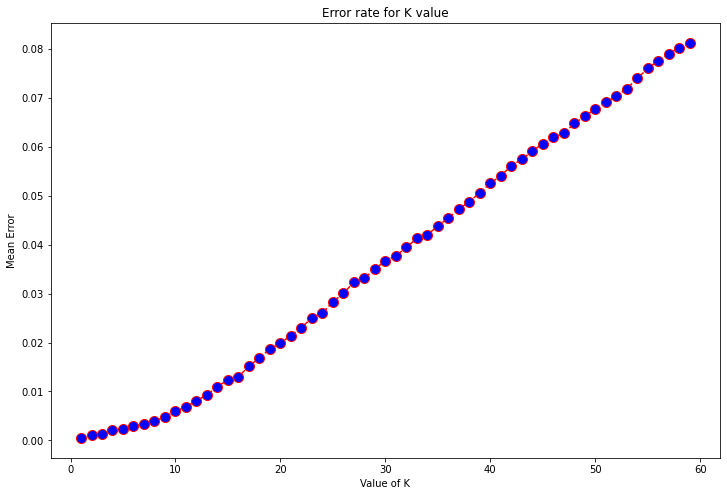

In [80]:
plt.figure(figsize=(12,8))
plt.plot(range(1, 60), error, color ='r', linestyle='dashed',marker='o',
         markerfacecolor='blue',markersize=10)
plt.title('Error rate for K value')
plt.xlabel("Value of K")
plt.ylabel("Mean Error")
plt.show()

Looking at the graph we get the lowest error for n_neighbors=2

In [35]:
knn = KNeighborsClassifier(n_neighbors=2)
knn=knn.fit(X_train1, Y_train1)

In [36]:
y_pred = knn.predict(X_test1)

In [37]:
precision = metrics.accuracy_score(y_pred, Y_test1) * 100
print("Accuracy with K-NN: {0:.2f}%".format(precision))

Accuracy with K-NN: 99.89%


Accuracy on Validation set¶

In [38]:
Y_pred2 = knn.predict(X_val1)

In [39]:
precision2 = accuracy_score(Y_pred2, Y_val1) * 100
print("Accuracy with KNN: {0:.6f}".format(precision2))

Accuracy with KNN: 91.136283


In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_val1, Y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       164
           1       0.95      0.86      0.90       148
           2       0.90      0.83      0.86       160
           3       0.93      0.99      0.96       164
           4       0.81      0.98      0.89       161
           5       0.96      0.99      0.97       164
           6       0.91      0.96      0.93       152
           7       1.00      0.73      0.84       164
           8       0.92      0.79      0.85       164
           9       1.00      0.82      0.90       144
          10       1.00      1.00      1.00       166
          11       0.87      0.93      0.90       164
          12       0.90      0.98      0.94       219
          13       0.99      0.97      0.98       164
          14       0.89      0.99      0.94       143
          15       0.95      1.00      0.98       166
          16       0.84      0.75      0.79       166
          17       0.83    

In [41]:
print(confusion_matrix(Y_val1, Y_pred2))

[[130   0   0 ...   0   0   0]
 [  0 127   0 ...   0   0   0]
 [  0   0 133 ...   0   0   0]
 ...
 [  0   0   0 ... 158   0   0]
 [  0   0   0 ...   0 249   0]
 [  0   0   0 ...   0   0 142]]


# Model 4:MLP

In [42]:
mlp = MLPClassifier()
mlp=mlp.fit(X_train1, Y_train1)

In [43]:
y_pred = mlp.predict(X_test1)

In [44]:
precision = metrics.accuracy_score(y_pred, Y_test1) * 100
print("Accuracy with MLP: {0:.2f}%".format(precision))

Accuracy with MLP: 99.92%


Accuracy on Validation set¶

In [45]:
Y_pred2 = mlp.predict(X_val1)

In [46]:
precision2 = accuracy_score(Y_pred2, Y_val1) * 100
print("Accuracy with MLP: {0:.6f}".format(precision2))

Accuracy with MLP: 91.387518


In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_val1, Y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       164
           1       0.95      0.91      0.93       148
           2       1.00      0.87      0.93       160
           3       0.88      0.96      0.92       164
           4       0.78      0.99      0.87       161
           5       0.99      0.99      0.99       164
           6       0.70      0.83      0.76       152
           7       1.00      0.65      0.79       164
           8       0.90      0.80      0.85       164
           9       0.99      0.76      0.86       144
          10       0.99      1.00      0.99       166
          11       0.83      0.90      0.86       164
          12       0.91      0.91      0.91       219
          13       1.00      0.99      1.00       164
          14       0.87      1.00      0.93       143
          15       1.00      1.00      1.00       166
          16       0.77      0.70      0.74       166
          17       0.61    

In [48]:
print(confusion_matrix(Y_val1, Y_pred2))

[[115   0   0 ...   0   0   0]
 [  0 135   0 ...   0   0   0]
 [  0   0 139 ...   0   0   0]
 ...
 [  0   0   0 ... 158   0   0]
 [  0   0   0 ...   0 249   0]
 [  0   0   0 ...   0   0 156]]


# Model 5: Bernoulli Naive Bayes  

In [56]:
gnb = GaussianNB()
gnb=gnb.fit(X_train1, Y_train1)

In [57]:
y_pred = gnb.predict(X_test1)

In [58]:
precision=metrics.accuracy_score(y_pred,Y_test1)*100
print("Accuracy with Gaussian Naive Bayes: {0:.6f}".format(precision))

Accuracy with Gaussian Naive Bayes: 84.158952


Accuracy on Validation Dataset

In [59]:
Y_pred2 = gnb.predict(X_val1)

In [60]:
precision2 = accuracy_score(Y_pred2, Y_val1) * 100
print("Accuracy with Gaussian Naive Bayes: {0:.6f}".format(precision2))

Accuracy with Gaussian Naive Bayes: 65.122532


In [61]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_val1, Y_pred2))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57       164
           1       0.46      0.75      0.57       148
           2       0.94      0.72      0.82       160
           3       0.74      0.78      0.76       164
           4       0.66      0.72      0.69       161
           5       0.76      0.60      0.67       164
           6       0.53      0.46      0.49       152
           7       0.77      0.67      0.72       164
           8       0.56      0.77      0.65       164
           9       0.45      0.53      0.49       144
          10       0.87      0.89      0.88       166
          11       0.45      0.85      0.59       164
          12       0.69      0.36      0.47       219
          13       0.70      0.73      0.71       164
          14       0.57      0.62      0.59       143
          15       0.79      0.66      0.72       166
          16       0.49      0.61      0.54       166
          17       0.02    

In [62]:
print(confusion_matrix(Y_val1, Y_pred2))

[[ 93   0   0 ...   0   0   0]
 [  0 111   0 ...   0   0   0]
 [  0   0 115 ...   0   0   0]
 ...
 [  0   0   0 ...  94   0   0]
 [  0   0   0 ...   0 248   0]
 [  0   0   0 ...   0   0  81]]


# Model 6:SVM with "linear" kernel

In [49]:
svm=svm.SVC(kernel='linear',gamma='auto')
svm=svm.fit(X_train1,Y_train1)

In [50]:
y_pred= svm.predict(X_test1)

In [51]:
precision=metrics.accuracy_score(y_pred,Y_test1)*100
print("Accuracy with SVM: {0:.6f}".format(precision))

Accuracy with SVM: 99.985227


Accuracy on Validation Dataset

In [52]:
Y_pred2 = svm.predict(X_val1)

In [53]:
precision2 = accuracy_score(Y_pred2, Y_val1) * 100
print("Accuracy with SVM: {0:.6f}".format(precision2))

Accuracy with SVM: 96.055183


In [54]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_val1, Y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       164
           1       1.00      1.00      1.00       148
           2       1.00      0.88      0.94       160
           3       0.94      1.00      0.97       164
           4       0.81      1.00      0.90       161
           5       0.99      0.99      0.99       164
           6       0.96      1.00      0.98       152
           7       0.99      0.96      0.97       164
           8       0.88      0.95      0.91       164
           9       0.99      1.00      1.00       144
          10       0.99      1.00      0.99       166
          11       1.00      1.00      1.00       164
          12       1.00      1.00      1.00       219
          13       0.98      1.00      0.99       164
          14       0.95      1.00      0.97       143
          15       0.93      1.00      0.96       166
          16       0.88      0.69      0.77       166
          17       0.78    

In [55]:
print(confusion_matrix(Y_val1, Y_pred2))

[[128   0   0 ...   0   0   0]
 [  0 148   0 ...   0   0   0]
 [  0   0 141 ...   0   0   0]
 ...
 [  0   0   0 ... 158   0   0]
 [  0   0   0 ...   0 249   0]
 [  0   0   0 ...   0   0 157]]
